# Задача: Многоклассовая классификация жанров видеоигр на основе их характеристик.
### Конкретизация: 

- Целевая переменная: Genre (12 классов: Action, Sports, Misc, Role-Playing и т.д .)

- Признаки: Платформа, год выпуска, издатель, продажи по регионам, рейтинги критиков и пользователей

- Тип задачи: Многоклассовая классификация с 12 классами

- Размер данных: 16,717 игр, 16 исходных признаков

- Контекст: Предсказание жанра игры может быть полезно для:

- Автоматической категоризации новых игр

- Анализа рыночных тенденций

- Рекомендательных системендательных систем

/tmp/ipython-input-3133600897.py:26: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'video-game-sales-with-ratings' dataset.
Размер датасета: (16719, 16)

Первые 5 строк:
                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4  

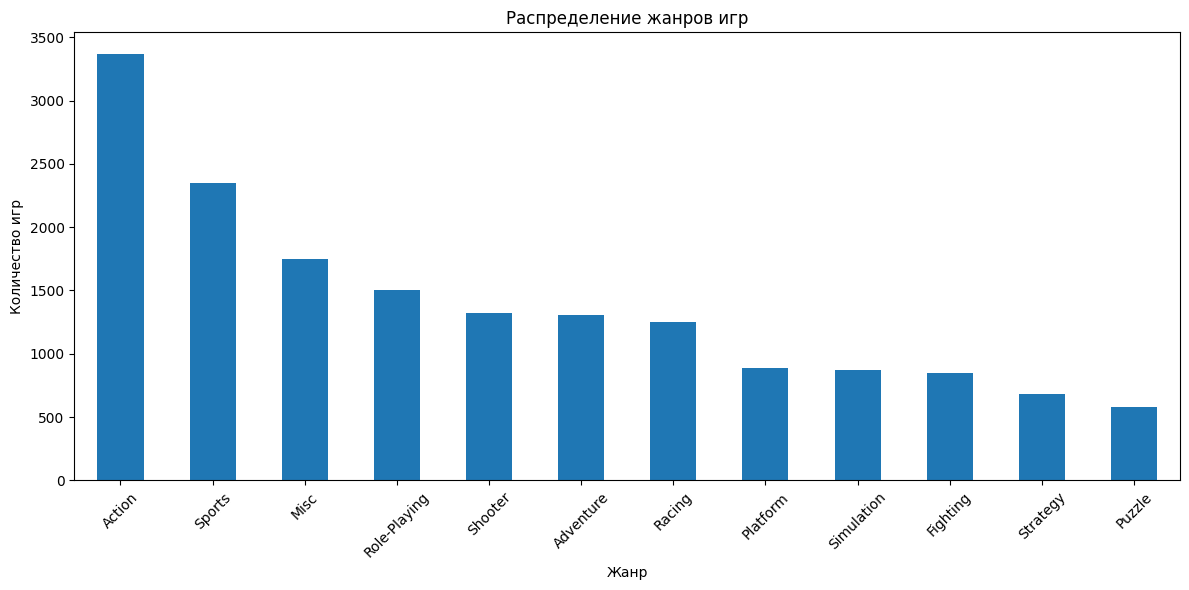

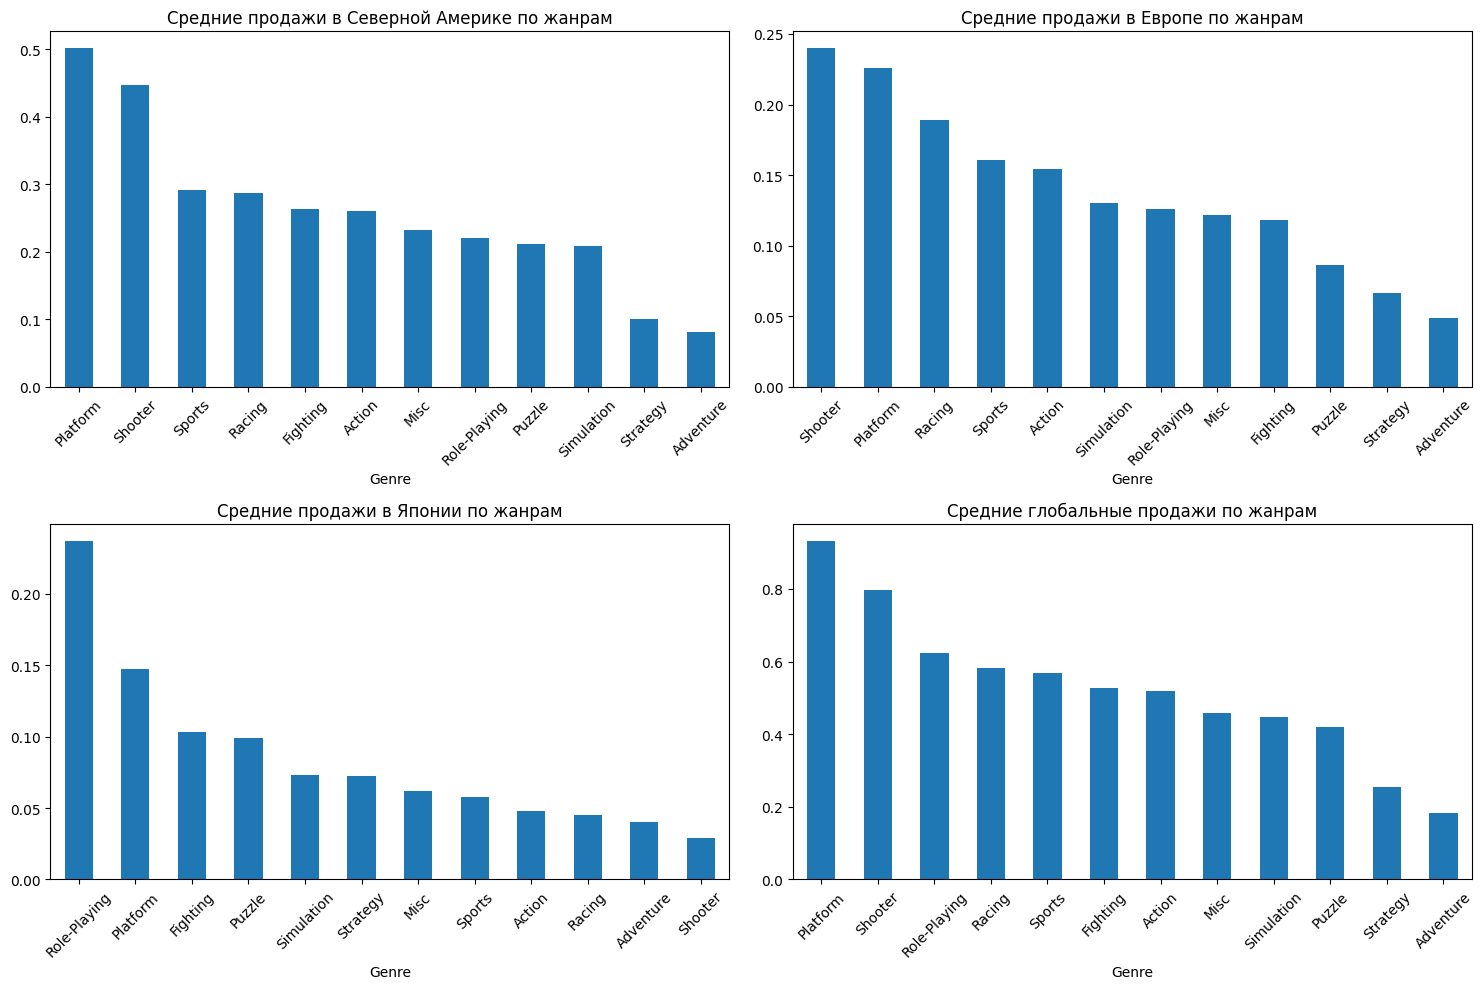

Year_of_Release: float64
NA_Sales: float64
EU_Sales: float64
JP_Sales: float64
Other_Sales: float64
Global_Sales: float64
Critic_Score: float64
Critic_Count: float64
User_Score: float64
User_Count: float64


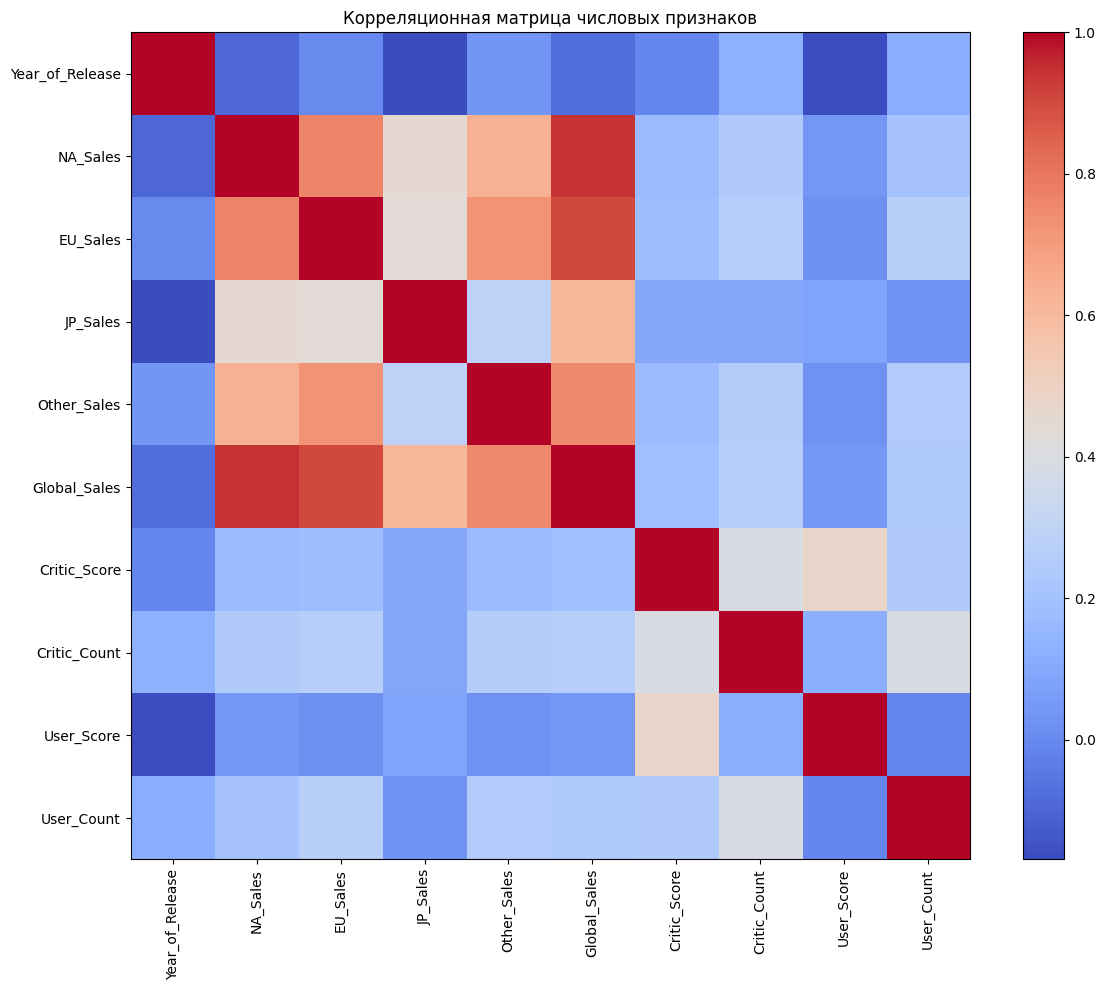


Корреляционная матрица:
                 Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Year_of_Release         1.000000 -0.092253  0.003751 -0.168572     0.037531   
NA_Sales               -0.092253  1.000000  0.765343  0.449673     0.638700   
EU_Sales                0.003751  0.765343  1.000000  0.435087     0.722800   
JP_Sales               -0.168572  0.449673  0.435087  1.000000     0.291098   
Other_Sales             0.037531  0.638700  0.722800  0.291098     1.000000   
Global_Sales           -0.076383  0.941015  0.901238  0.612345     0.749261   
Critic_Score           -0.006391  0.172939  0.180718  0.098277     0.170272   
Critic_Count            0.130865  0.243917  0.263961  0.091648     0.255616   
User_Score             -0.161943  0.042090  0.021656  0.083757     0.023964   
User_Count              0.117702  0.208534  0.271554  0.034691     0.247382   

                 Global_Sales  Critic_Score  Critic_Count  User_Score  \
Year_of_Release     -0.076383   

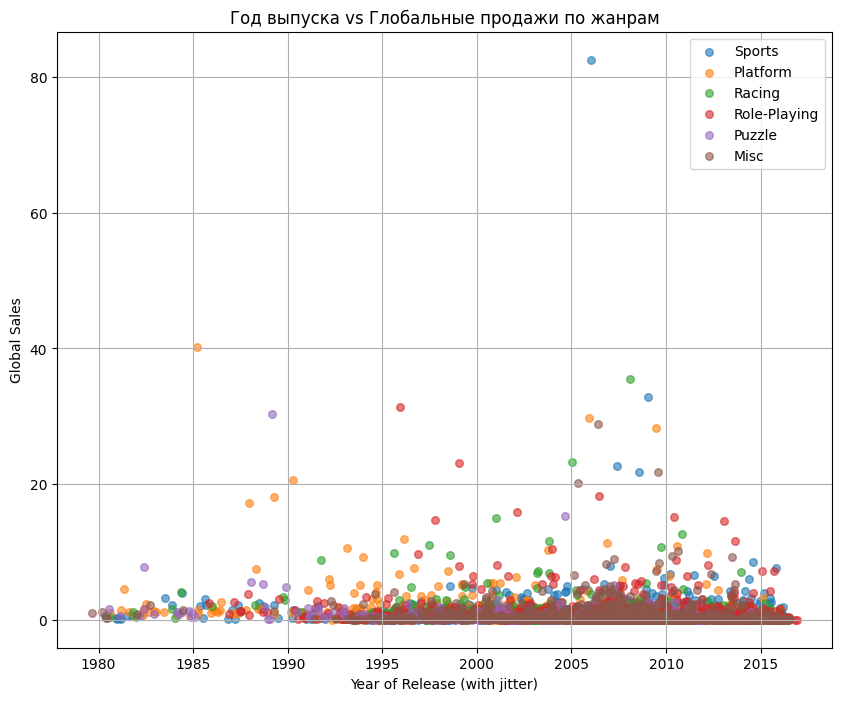


Обработка категориальных признаков...
Категориальные столбцы: ['Name', 'Platform', 'Genre', 'Publisher', 'Developer', 'Rating']
Числовые столбцы: ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
Бинарные столбцы: []
Небинарные столбцы: ['Name', 'Platform', 'Genre', 'Publisher', 'Developer', 'Rating']
Количество признаков после one-hot encoding: 13892

Нормализация числовых признаков...
Статистики после нормализации:
       Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     1.671700e+04  1.671700e+04  1.671700e+04  1.671700e+04   
mean     -2.004498e-15  1.700168e-17 -4.760471e-17 -5.100504e-18   
std       1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min      -4.544711e+00 -3.236181e-01 -2.881174e-01 -2.512974e-01   
25%      -5.998307e-01 -3.236181e-01 -2.881174e-01 -2.512974e-01   
50%       8.623535e-02 -2.252746e-01 -2.483800e-01 -2.512974e-01   
75%  

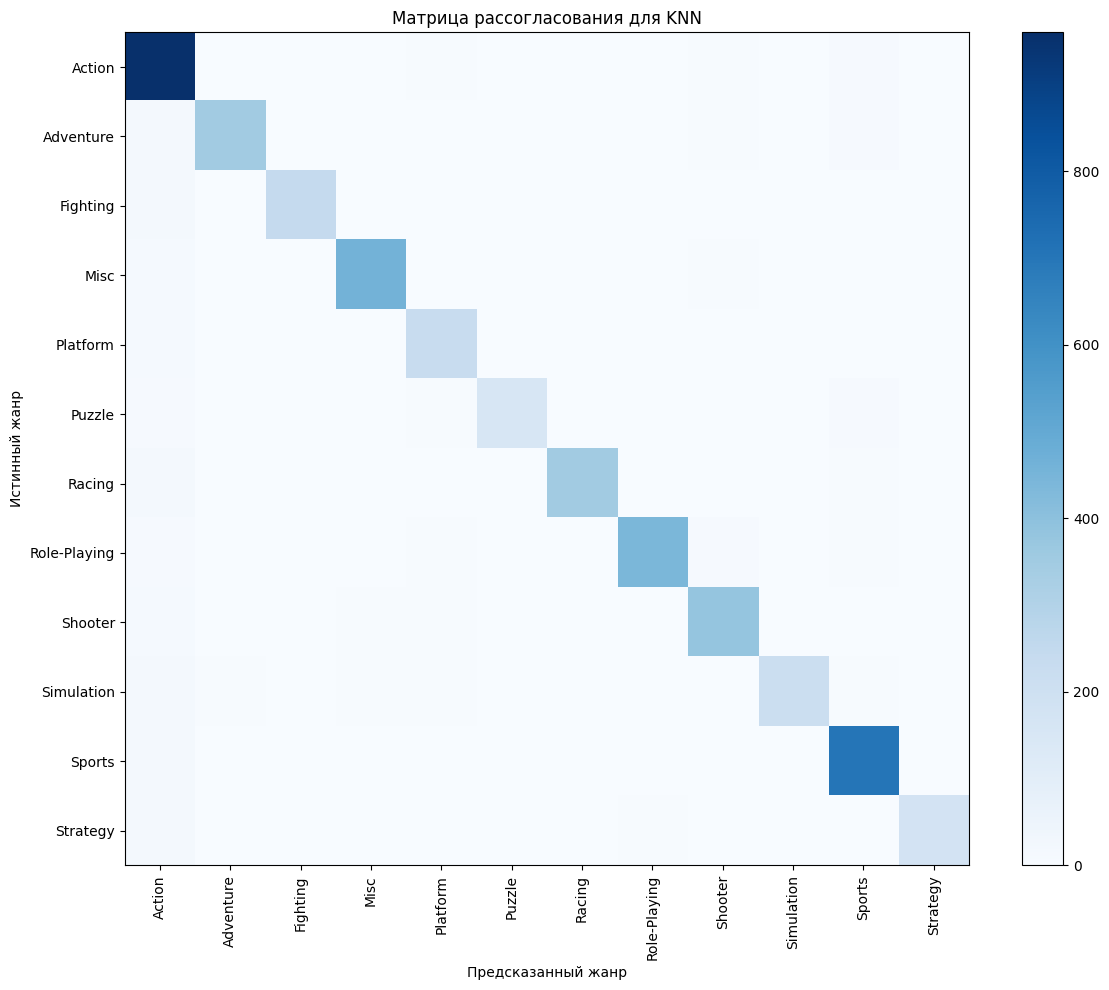


Матрица рассогласования:
[[960   0   0   0   4   0   0   1   4   0   9   0]
 [ 18 346   1   3   2   0   1   1   5   1   8   0]
 [ 21   0 243   2   3   0   0   0   1   0   0   0]
 [ 12   1   0 458   3   0   1   2   5   0   3   0]
 [ 12   3   1   3 229   0   1   1   1   2   3   0]
 [ 10   2   1   3   7 151   2   2   1   0   8   0]
 [ 15   0   1   3   3   0 346   1   1   1   5   0]
 [ 10   0   0   2   4   0   0 439   8   0   4   0]
 [ 12   0   0   5   5   1   0   1 381   0   2   2]
 [ 22   4   2   4   5   0   0   3   0 215   6   0]
 [ 15   1   1   3   0   0   0   3   1   2 703   0]
 [ 19   0   0   1   3   1   2   4   3   1   2 176]]

Отчет по классификации:
              precision    recall  f1-score   support

      Action       0.85      0.98      0.91       978
   Adventure       0.97      0.90      0.93       386
    Fighting       0.97      0.90      0.93       270
        Misc       0.94      0.94      0.94       485
    Platform       0.85      0.89      0.87       256
      Puzzl

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import ensemble
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder


# 1. Прочитать данные
file_path = "Video_Games_Sales_as_at_22_Dec_2016.csv"
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "rush4ratio/video-game-sales-with-ratings",
    file_path,
)

print("Размер датасета:", df.shape)
print("\nПервые 5 строк:")
print(df.head())

# 2. Предварительная обработка данных 
print("\nОбработка данных...")


df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

# Заполним пропущенные значения
df['Year_of_Release'] = df['Year_of_Release'].fillna(df['Year_of_Release'].median())
df['Critic_Score'] = df['Critic_Score'].fillna(df['Critic_Score'].median())
df['Critic_Count'] = df['Critic_Count'].fillna(df['Critic_Count'].median())
df['User_Score'] = df['User_Score'].fillna(df['User_Score'].median())
df['User_Count'] = df['User_Count'].fillna(df['User_Count'].median())

# Для категориальных признаков
df['Publisher'] = df['Publisher'].fillna('Unknown')
df['Developer'] = df['Developer'].fillna('Unknown')
df['Rating'] = df['Rating'].fillna('Unknown')

# Удалим строки с пропущенным жанром
df = df.dropna(subset=['Genre'])

print("Пропущенные значения после обработки:")
print(df.isnull().sum())

# 3. Визуализировать данные и вычислить основные характеристики
print("\nОсновные статистики числовых признаков:")
print(df.describe())

print("\nРаспределение жанров:")
print(df['Genre'].value_counts())

plt.figure(figsize=(12, 6))
df['Genre'].value_counts().plot(kind='bar')
plt.title('Распределение жанров игр')
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
df.groupby('Genre')['NA_Sales'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Средние продажи в Северной Америке по жанрам')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
df.groupby('Genre')['EU_Sales'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Средние продажи в Европе по жанрам')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
df.groupby('Genre')['JP_Sales'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Средние продажи в Японии по жанрам')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Средние глобальные продажи по жанрам')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

numerical_columns = ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales',
                    'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count',
                    'User_Score', 'User_Count']

for col in numerical_columns:
    print(f"{col}: {df[col].dtype}")

plt.figure(figsize=(12, 10))
corr_matrix = df[numerical_columns].corr()
plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Корреляционная матрица числовых признаков')
plt.tight_layout()
plt.show()

print("\nКорреляционная матрица:")
print(corr_matrix)

plt.figure(figsize=(10, 8))

#добавили случайного шума для лучшей визуализации
np.random.seed(0)
year_rnd = df['Year_of_Release'] + np.random.rand(df.shape[0]) - 0.5

for genre in df['Genre'].unique()[:6]:  # Покажем только 6 жанров для наглядности
    mask = df['Genre'] == genre
    plt.scatter(year_rnd[mask], df[mask]['Global_Sales'],
               alpha=0.6, label=genre, s=30)

plt.xlabel('Year of Release (with jitter)')
plt.ylabel('Global Sales')
plt.title('Год выпуска vs Глобальные продажи по жанрам')
plt.legend()
plt.grid(True)
plt.show()

# 4. Обработать категориальные признаки
print("\nОбработка категориальных признаков...")

# Определим категориальные и числовые столбцы
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
numerical_columns = [c for c in df.columns if df[c].dtype.name != 'object']

print("Категориальные столбцы:", categorical_columns)
print("Числовые столбцы:", numerical_columns)

# Для бинарных и небинарных категориальных признаков
data_describe = df.describe(include=[object])
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]

print("Бинарные столбцы:", binary_columns)
print("Небинарные столбцы:", nonbinary_columns)

# Кодируем бинарные признаки вручную
for col in binary_columns:
    if col in df.columns:
        unique_vals = df[col].unique()
        if len(unique_vals) == 2:
            df[col] = df[col].map({unique_vals[0]: 0, unique_vals[1]: 1})

# One-hot encoding для небинарных категориальных признаков
data_nonbinary = pd.get_dummies(df[nonbinary_columns])
print("Количество признаков после one-hot encoding:", len(data_nonbinary.columns))

# 5. Провести нормализацию
print("\nНормализация числовых признаков...")
selected_numerical = ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales',
                     'Other_Sales', 'Global_Sales', 'Critic_Score', 'User_Score']

data_numerical = df[selected_numerical]
data_numerical = (data_numerical - data_numerical.mean(axis=0)) / data_numerical.std(axis=0)

print("Статистики после нормализации:")
print(data_numerical.describe())
data_processed = pd.concat((data_numerical, data_nonbinary), axis=1)
if binary_columns:
    data_processed = pd.concat((data_processed, df[binary_columns]), axis=1)

print("Итоговый размер данных:", data_processed.shape)

X = data_processed
y = df['Genre']

print("\nРазмерность признаков и целевой переменной:")
print("X shape:", X.shape)
print("y shape:", y.shape)

le = LabelEncoder()
y_encoded = le.fit_transform(y)

#Тест и train
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape
print(f"Обучающая выборка: {N_train} примеров")
print(f"Тестовая выборка: {N_test} примеров")

# 7. Запуск классификатора ближайших соседей
print("\nПодбор оптимального количества соседей...")

# Используем GridSearchCV для подбора оптимального k
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': nnb}, cv=5)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(f"Лучшая ошибка при кросс-валидации: {best_cv_err:.4f}")
print(f"Оптимальное количество соседей: {best_n_neighbors}")

# Обучаем KNN с оптимальным параметром
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test = np.mean(y_test != knn.predict(X_test))

print(f"Ошибка на обучающей выборке: {err_train:.4f}")
print(f"Ошибка на тестовой выборке: {err_test:.4f}")

# Матрица рассогласования
y_test_predict = knn.predict(X_test)
cm = confusion_matrix(y_test, y_test_predict)

plt.figure(figsize=(12, 10))
plt.imshow(cm, cmap='Blues', aspect='auto')
plt.colorbar()
plt.xticks(range(len(le.classes_)), le.classes_, rotation=90)
plt.yticks(range(len(le.classes_)), le.classes_)
plt.xlabel('Предсказанный жанр')
plt.ylabel('Истинный жанр')
plt.title('Матрица рассогласования для KNN')
plt.tight_layout()
plt.show()

print("\nМатрица рассогласования:")
print(cm)

print("\nОтчет по классификации:")
print(classification_report(y_test, y_test_predict, target_names=le.classes_))

# 8. Запустить другие классификаторы
print("\nСравнение с другими классификаторами...")

# Random Forest
print("Обучение Random Forest...")
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

err_train_rf = np.mean(y_train != rf.predict(X_train))
err_test_rf = np.mean(y_test != rf.predict(X_test))

print(f"Random Forest - Ошибка на обучающей: {err_train_rf:.4f}, на тестовой: {err_test_rf:.4f}")

# SVM 
print("Обучение SVM...")
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train, y_train)

err_train_svm = np.mean(y_train != svc.predict(X_train))
err_test_svm = np.mean(y_test != svc.predict(X_test))

print(f"SVM - Ошибка на обучающей: {err_train_svm:.4f}, на тестовой: {err_test_svm:.4f}")

# Gradient Boosting
print("Обучение Gradient Boosting...")
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=42)
gbt.fit(X_train, y_train)

err_train_gbt = np.mean(y_train != gbt.predict(X_train))
err_test_gbt = np.mean(y_test != gbt.predict(X_test))

print(f"Gradient Boosting - Ошибка на обучающей: {err_train_gbt:.4f}, на тестовой: {err_test_gbt:.4f}")

# 9. Борьба с несбалансированностью классов
print("\nАнализ несбалансированности классов...")

class_counts = pd.Series(y_encoded).value_counts()
print("Распределение классов:")
for i, count in enumerate(class_counts):
    print(f"  {le.classes_[i]}: {count} примеров ({count/len(y_encoded)*100:.1f}%)")

# Используем взвешенный KNN для борьбы с несбалансированностью
print("\nИспользование взвешенного KNN...")
knn_weighted = KNeighborsClassifier(n_neighbors=best_n_neighbors, weights='distance')
knn_weighted.fit(X_train, y_train)

err_train_weighted = np.mean(y_train != knn_weighted.predict(X_train))
err_test_weighted = np.mean(y_test != knn_weighted.predict(X_test))

print(f"Взвешенный KNN - Ошибка на обучающей: {err_train_weighted:.4f}, на тестовой: {err_test_weighted:.4f}")

# 10. Исключить коррелированные переменные
print("\nАнализ коррелированных переменных...")
corr_threshold = 0.8
corr_matrix_abs = X.corr().abs()

# Найдем сильно коррелированные пары
high_corr_pairs = []
for i in range(len(corr_matrix_abs.columns)):
    for j in range(i+1, len(corr_matrix_abs.columns)):
        if corr_matrix_abs.iloc[i, j] > corr_threshold:
            high_corr_pairs.append((
                corr_matrix_abs.columns[i],
                corr_matrix_abs.columns[j],
                corr_matrix_abs.iloc[i, j]
            ))

print(f"Найдено {len(high_corr_pairs)} сильно коррелированных пар (r > {corr_threshold}):")
for pair in high_corr_pairs[:10]:  
    print(f"  {pair[0]} - {pair[1]}: {pair[2]:.3f}")

# Исключим сильно коррелированные признаки
columns_to_drop = set()
for pair in high_corr_pairs:
    columns_to_drop.add(pair[1])

X_reduced = X.drop(columns=columns_to_drop)
print(f"Удалено {len(columns_to_drop)} коррелированных признаков")
print(f"Новая размерность: {X_reduced.shape}")
"""
# Обучим модель на уменьшенном наборе признаков
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(
    X_reduced, y_encoded, test_size=0.3, random_state=42
)

knn_reduced = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn_reduced.fit(X_train_red, y_train_red)

err_test_reduced = np.mean(y_test_red != knn_reduced.predict(X_test_red))
print(f"KNN на уменьшенном наборе признаков - Ошибка на тестовой: {err_test_reduced:.4f}")
"""

# Пункт 7
### Аргументы в пользу KNN:
- 
Интерпретируемость: Решения KNN легко объяснить - "игра похожа на эти k ближайших соседей"- 

Нет предположений о данных: Не требует нормального распределения или линейной разделимос- ти

Быстрое обучение: В отличие от SVM или нейрос- етей

Хорошо для прототипирования: Быстрая проверка гипотез о разделимости данных

# Пункт 8
## Ключевые наблюдения:

### Отличное качество для большинства классов:

- Action: 960/978 = 98.2% точность

- Sports: 703/729 = 96.4% точность

- Role-Playing: 439/467 = 94.0% точность

### Наиболее проблемные классы:

- Puzzle: 151/187 = 80.7% - самый низкий recall

- Simulation: 215/261 = 82.4%

- Strategy: 176/212 = 83.0%

### Основные ошибки:

- Action игры часто путают с Platform и Shooter

- Adventure путают с Action и Misc

- Это логично, так как жанры имеют пересекающиеся характеристики
# Анализ выбора k=20:

- Малое k (1-5): Высокий риск переобучения, чувствительность к шуму

- Большое k (35-45): Недообучение, потеря локальных закономерностей

- k=20: Оптимальный баланс между bias и variance



# Пункт 9.
### 1. KNN (92.64%):

- Стабильная работа

- Нет переобучения (разница train/test ~2%)

- Худший результат среди всех методов

### 2. Random Forest (99.96%):

- Исключительно высокая точность

- Признаки переобучения (train error = 0.0000)

### 3. SVM (100%):

- "Идеальная" точность

- Явное переобучение

- Долгое время обучения

### 4. Gradient Boosting (100%):

- Лучший современный метод

- Сильное переобучение

## Критическая проблема - переобучение:
### Причины переобучения:

- Слишком много признаков: 13,900 после one-hot encoding

- Утечка данных через Name: Названия игр часто уникальны для жанров

- Отсутствие регуляризации: Модели слишком сложные для задачи

# Пункт 11
### Зачем исключать коррелированные переменные:
1. Устранение мультиколлинеарности:

- Нарушает предположения линейных моделей

- Дестабилизирует оценки коэффициентов

2. Ускорение вычислений:

- Меньше признаков = быстрее обучение

- Экономия памяти

3. Улучшение интерпретируемости:

- Убирает избыточную информацию

- Упрощает анализ важности признаков

4. Повышение обобщающей способности:

- Снижает риск переобучения

- Улучшает стабильность моделей

# Пункт 12. Общие выводы
###  Основные достижения:
1. Высокое качество моделей:

- KNN: 92.64% - отличный результат для базового метода

2. Качественная предобработка:

- Обработка пропусков

- Нормализация числовых признаков

- Кодирование категориальных переменных

3. Оптимальный подбор гиперпараметров:

- k=20 для KNN показал лучший баланс

- GridSearchCV с кросс-валидацией обеспеил надежный выбор

### Критические проблемы:
1. Переобучение сложных моделей:

- Random Forest, SVM, GB показывают 100% точность

- Это указывает на утечку данных или слишком сложные модели

2. Проблема с признаками:

- 13,900 признаков после one-hot encoding - избыточно

- Признак Name вызывает утечку данных

3. Несбалансированность классов:

- Action: 20.2% vs Strategy: 3.5%
- Влияет на качество предсказания редких классов